 <h1 align="center">Find a car Park</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira & Shay Leyzerovich</h3>   

In this project we propose to develop a model for identifying whether there is free space in theparking lot image, or whether the parking is full.

# Report:

In this project we have classification problem. We wish to recognize whether the parking spot is full or free in an image. Our data set contains a huge amount of parking spots images. Therefore our features will be the images pixels and the label divided to free and full.

**Preprocessing: Preparing Data:**

In order to use the data we needed to make some adjustments.

- In the first stage we imported the data, we tried to work with RGB data but it was too heavy to handle on our computer, so we used grayscale images but we've got lower results so we decided to stay with our original images. Another thing is that the data was too big and cause hardware and memory problems- there was too many images and all of them with high quality.
  Thus we resized the pictures and took some samples from the data instead of all the images in the dataset. 
- In the next stage we did label encoding: 1 for free , 0 for full.
- We normalize all the data in order to clean noise from the images.
- In addition, we defined a random seed in order to compare between the logistic model and the feed-forward model. 
- After that , we divide the set into two parts: 80% for training and 20% for testing. We decided not to make validation data because of our low hardware.

**Building the logistic regression model:**

At first, we build a basic model for our problem and check the results.
- We improved the model by changing the function to sigmoid instead of the function we saw in class. 
- In order to Faced the problem of overfitting/underfitting we reduced the number of iteration and handle the learning rate until we have got a nice decreacing of our loss function.
- The logistic model got 86% correct on the testing set after training.
- According to the confusion matrix we can conclude it was more difficult for the logistic model to identify images of free parking than full parking images.  

**Building the feed-forward neural network model:**

-	We build the network with 2 hidden layers ; the first hidden layer has 128 neurons and the second has 256 neurons. 
-	We used the relu activation function to bring more power to the model.
-	We tryed the dropout function to avoid over fitting but the train error was very high and it extended the time of the model training, so in the end we decided not to use it.
-	The feed-forward model got 90% correct on the testing set after training.
-	In the beginning we use a low learning rate and because of that we never got to the minimum loss. In order to fix that we  choose a bigger learning  rate.
-	We weren’t satisfied with the results and in order to improve them:
    -	 we changed the amount of iterations - to avoid over fitting
    -	 we changed the size and amount of hidden layers.

**Comparison to the logistic regression model:**

We've saw that the feed forward network got better results but it is more complex model than the logistic regression, therefore it took more time to train it.


You can find more specific details, screenshots and plots during the code below.

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:
- tensorflow v1
- sklearn

In [1]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
import cv2
import os
from tqdm import tqdm
import numpy as np
import random as rn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rs = 42 # random seed

### fix random seed:

In [2]:
np.random.seed(rs)
rn.seed(rs)
tf.set_random_seed(rs)

### import the data:

In [3]:
X = []
Z = []
IMG_SIZE=150

FREE_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Free_part'
FULL_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Full_part'

In [4]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))

In [5]:
# make 'Full' data
make_train_data('Full',FULL_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 366/366 [00:11<00:00, 30.59it/s]

366


In [6]:
# make 'Free' data
make_train_data('Free',FREE_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 356/356 [00:11<00:00, 29.67it/s]

722


### The description of the data:

1. Number of instances: ---

2. Number of attributes: --- (type here what is the feature)

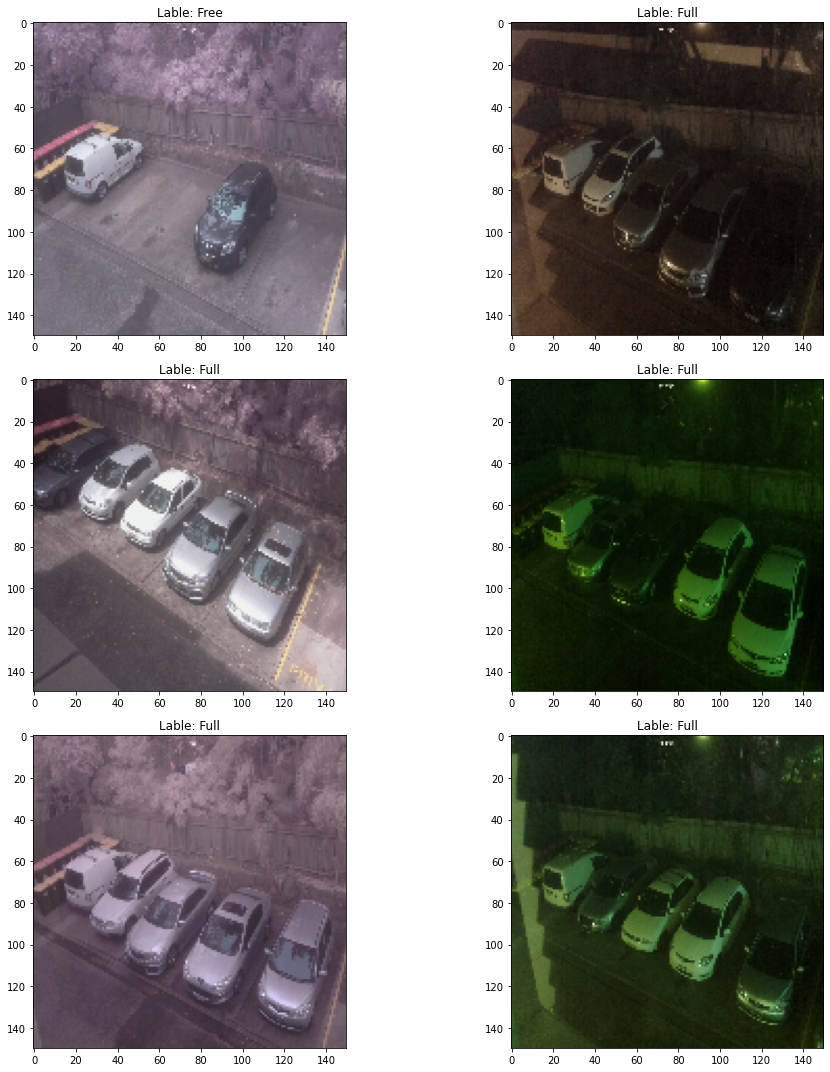

In [7]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Lable: '+Z[l])
        
plt.tight_layout()

### Label encoding of the target:
'Full' = 0

'Free' = 1

In [8]:
Y = np.array(Z)
Y = np.where(Y=='Full', 0, Y)
Y = np.where(Y=='Free', 1, Y)
Y = Y.astype('int32')

### normalization and flatten the images:

In [9]:
X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization
X=np.array(X)/255
X = X.flatten().reshape(len(X), (IMG_SIZE ** 2) * 3) # 3 is because it is RGB image 
# X = X.flatten().reshape(len(X), (IMG_SIZE ** 2)) 

#### our dataset:

In [10]:
df = pd.DataFrame(data=X)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.215686,0.149020,0.223529,0.223529,0.176471,0.235294,0.223529,0.176471,0.211765,0.200000,...,0.517647,0.329412,0.490196,0.462745,0.447059,0.545098,0.552941,0.466667,0.549020,0.545098
1,0.219608,0.141176,0.215686,0.235294,0.172549,0.227451,0.227451,0.160784,0.207843,0.243137,...,0.478431,0.450980,0.517647,0.525490,0.454902,0.517647,0.529412,0.482353,0.545098,0.552941
2,0.121569,0.164706,0.113725,0.145098,0.188235,0.113725,0.113725,0.168627,0.101961,0.141176,...,0.321569,0.239216,0.509804,0.356863,0.243137,0.521569,0.349020,0.239216,0.533333,0.356863
3,0.203922,0.149020,0.192157,0.231373,0.176471,0.207843,0.247059,0.180392,0.247059,0.258824,...,0.478431,0.443137,0.509804,0.490196,0.450980,0.521569,0.521569,0.454902,0.509804,0.509804
4,0.160784,0.168627,0.207843,0.203922,0.188235,0.207843,0.145098,0.149020,0.168627,0.207843,...,0.466667,0.392157,0.505882,0.486275,0.396078,0.505882,0.501961,0.435294,0.564706,0.560784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.094118,0.129412,0.137255,0.156863,0.200000,0.141176,0.137255,0.176471,0.117647,0.156863,...,0.137255,0.282353,0.478431,0.360784,0.435294,0.803922,0.580392,0.552941,0.941176,0.713725
718,0.078431,0.027451,0.035294,0.094118,0.035294,0.050980,0.117647,0.062745,0.066667,0.129412,...,0.415686,0.701961,0.792157,0.843137,0.447059,0.447059,0.478431,0.431373,0.435294,0.454902
719,0.082353,0.027451,0.062745,0.098039,0.043137,0.078431,0.156863,0.082353,0.098039,0.137255,...,0.415686,0.713725,0.760784,0.823529,0.439216,0.431373,0.486275,0.435294,0.423529,0.482353
720,0.098039,0.035294,0.054902,0.098039,0.047059,0.066667,0.243137,0.117647,0.164706,0.254902,...,0.333333,0.619608,0.662745,0.737255,0.431373,0.447059,0.486275,0.427451,0.431373,0.470588


We can see that the size of an image is 150 \* 150 \* 3 = 67500 that later it would be our featrues in our models.

In [11]:
X.shape

(722, 67500)

### Train-Test Split:

In [12]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=rs, shuffle=True)

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == 0).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == 0).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == 0).sum()+(y_test == 0).sum()]},
                     index=["Free", "Full"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Free,289,67,356
Full,288,78,366


We'll build a classifier with two classes: "full",
so we create the according labels.

In [13]:
labels_train = (np.arange(2) == y_train[:,None]).astype(np.float32)
labels_test = (np.arange(2) == y_test[:,None]).astype(np.float32)

Define a function that calculate the statistics:

In [14]:
def statistics(confusion):
    TP = sess.run(confusion[1, 1])
    TN = sess.run(confusion[0, 0])
    FP = sess.run(confusion[0, 1])
    FN = sess.run(confusion[1, 0])
    print('True Positives (TP):',TP)
    print('True Negatives (TN):',TN)
    print('False Positives (FP):',FP)
    print('False Negarives (FN):',FN)
    print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
    precision = TN / float(TN + FP)
    print('Precision:',precision)
    recall = TP / float(TP + FN)
    print('Recall:', recall)
    print('f-score:', 2 * precision * recall / (precision + recall))

### Begin building the Logistic-Regression model using tensorflow.v1:

1. Define placeholders

In [15]:
tf.compat.v1.disable_eager_execution()
data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

2. Declare the variables that need to be learned and initialization.
   
   The number of variable is the number of the features (X.shape[1], 1)

In [16]:
W = tf.Variable(tf.zeros(shape=[X.shape[1], 1])) # tf.random_normal maybe better
b = tf.Variable(tf.zeros(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

3. Declare the model you need to learn

In [17]:
mod = tf.add(tf.matmul(data, W), b)
# y = 1 / (1.0 + tf.exp(-(tf.matmul(data,W) + b))) # tf.nn.sigmoid(tf.matmul(data,W) + b)

4. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [18]:
learning_rate = 0.003
batch_size = 30
iter_num = 850

5. Loss function and optimizer:
    
    We use the sigmoid cross-entropy loss function,
    
    meaning, first doing a sigmoid on the model result and then using the cross-entropy loss function.

In [19]:
# We want to minimize the loss function using the Gradient-Decent method
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

6. Define the accuracy

In [20]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

### End of the definition of the model framework

In [21]:
# Define the variable that saves the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the  Logistic-Regression model:

In [22]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(optimizer, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    # output
    if (epoch + 1) % 50 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:   50 loss: 0.840190 train_acc: 0.707106 test_acc: 0.648276
epoch:  100 loss: 0.447235 train_acc: 0.734835 test_acc: 0.724138
epoch:  150 loss: 0.346675 train_acc: 0.785095 test_acc: 0.724138
epoch:  200 loss: 0.329496 train_acc: 0.826690 test_acc: 0.765517
epoch:  250 loss: 0.356295 train_acc: 0.876950 test_acc: 0.820690
epoch:  300 loss: 0.416021 train_acc: 0.816291 test_acc: 0.744828
epoch:  350 loss: 0.267633 train_acc: 0.731369 test_acc: 0.751724
epoch:  400 loss: 0.385136 train_acc: 0.896014 test_acc: 0.834483
epoch:  450 loss: 0.404295 train_acc: 0.816291 test_acc: 0.772414
epoch:  500 loss: 0.178976 train_acc: 0.922010 test_acc: 0.827586
epoch:  550 loss: 0.205728 train_acc: 0.864818 test_acc: 0.772414
epoch:  600 loss: 0.213700 train_acc: 0.915078 test_acc: 0.806897
epoch:  650 loss: 0.141315 train_acc: 0.821490 test_acc: 0.724138
epoch:  700 loss: 0.156393 train_acc: 0.939341 test_acc: 0.820690
epoch:  750 loss: 0.216940 train_acc: 0.916811 test_acc: 0.834483
epoch:  80

### Visualization of the loss function results:

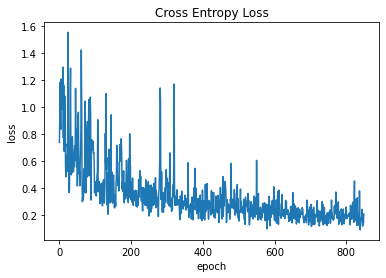

In [23]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can see that the loss value reduce during the train, there's a graph that shows that.

In [24]:
y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})

In [25]:
tf.compat.v1.math.confusion_matrix
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.int32)
print(sess.run(confusion))

[[66 12]
 [ 7 60]]


In [26]:
statistics(confusion)

True Positives (TP): 60
True Negatives (TN): 66
False Positives (FP): 12
False Negarives (FN): 7
Classification Accuracy: 0.8689655172413793
Precision: 0.8461538461538461
Recall: 0.8955223880597015
f-score: 0.8701384311140409


The results indicate that the model could not recognize a lot of free parking spot because of the recall but when it did the precision was high.

### Begin building the feed-forward neural network model using tensorflow.v1:

1. Define placeholders

In [27]:
tf.compat.v1.disable_eager_execution()
X = tf.placeholder("float", shape=[None, X_train.shape[1]])
y = tf.placeholder("float", shape=[None, 2])

2. Define the structure of the net and initialization.

In [28]:
# Layer's sizes
x_size = X_train.shape[1]   # The number of pixels in the image
y_size = 2   # Number of outcomes ('Free' or 'Full')

# First layer
hid1_size = 256
w1 = tf.Variable(tf.random_normal([hid1_size, x_size], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
# y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(X)), b1)), keep_prob=0.5)
y1 = tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(X)), b1))

# Second layer
hid2_size = 128
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
# y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)
y2 = tf.nn.relu(tf.add(tf.matmul(w2, y1), b2))

# Output layer
wo = tf.Variable(tf.random_normal([y_size, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([y_size, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

5. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [29]:
learning_rate = 0.003
batch_size = 30
iter_num = 650

3. Loss function and optimizer (Back Propagation):

In [30]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yo))
updates = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



4. Define the accuracy

In [31]:
predict = tf.argmax(yo, axis=1)

### End of the definition of the model framework

In [32]:
# Define the variable that saves the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the feed-forward neural network model:

In [33]:
for epoch in range(iter_num):
    avg_loss = 0.0
    
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(labels_train[batch_index])
    
    for i in range(batch_train_X.shape[0]):
        sess.run(updates, feed_dict={X: batch_train_X[i: i + 1], y: batch_train_y[i: i + 1]})
        temp_loss = sess.run(loss, feed_dict={X: batch_train_X[i, None], y: batch_train_y[i, None]})
        avg_loss += temp_loss
    
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = np.mean(np.argmax(labels_train, axis=1) == sess.run(predict, feed_dict={X: X_train, y: labels_train}))
    temp_test_acc  = np.mean(np.argmax(labels_test, axis=1) == sess.run(predict, feed_dict={X: X_test, y: labels_test}))
    avg_loss /= batch_train_X.shape[0]
    
    # recode the result
    loss_trace.append(avg_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    # output
    if (epoch + 1) % 50 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, avg_loss, temp_train_acc, temp_test_acc))

epoch:   50 loss: 0.277056 train_acc: 0.807626 test_acc: 0.751724
epoch:  100 loss: 0.152377 train_acc: 0.831889 test_acc: 0.772414
epoch:  150 loss: 0.124831 train_acc: 0.908146 test_acc: 0.793103
epoch:  200 loss: 0.057886 train_acc: 0.920277 test_acc: 0.806897
epoch:  250 loss: 0.045593 train_acc: 0.807626 test_acc: 0.786207
epoch:  300 loss: 0.016281 train_acc: 0.948007 test_acc: 0.848276
epoch:  350 loss: 0.019258 train_acc: 0.963605 test_acc: 0.841379
epoch:  400 loss: 0.022346 train_acc: 0.979203 test_acc: 0.882759
epoch:  450 loss: 0.018164 train_acc: 0.979203 test_acc: 0.875862
epoch:  500 loss: 0.015170 train_acc: 0.970537 test_acc: 0.834483
epoch:  550 loss: 0.006776 train_acc: 0.991334 test_acc: 0.917241
epoch:  600 loss: 0.008668 train_acc: 0.987868 test_acc: 0.875862
epoch:  650 loss: 0.008014 train_acc: 0.984402 test_acc: 0.896552


### Visualization of the loss function results:

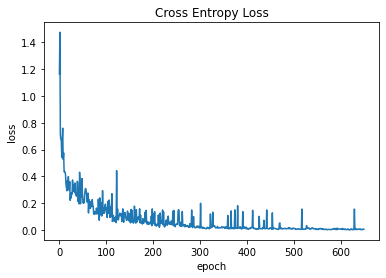

In [34]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [35]:
y_predictions = sess.run(predict, feed_dict={X: X_test, y: labels_test})

In [36]:
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.int32)
print(sess.run(confusion))

[[67 11]
 [ 4 63]]


In [37]:
statistics(confusion)

True Positives (TP): 63
True Negatives (TN): 67
False Positives (FP): 11
False Negarives (FN): 4
Classification Accuracy: 0.896551724137931
Precision: 0.8589743589743589
Recall: 0.9402985074626866
f-score: 0.897798574922897
